# Signals, Systems, and Transforms: A Unified Notebook

This notebook gives an overview of:

1. Complex exponentials and the complex plane  
2. Fourier Series, Fourier Transform, Laplace Transform, and the s-plane  
3. Discrete-time signals, the z-plane, Z-transform, DTFT, DFT, and FFT  
4. Convolution, impulse response, and linear superposition  
5. Poles and zeros, FIR vs IIR, and recurrence relations  
6. Poles as modes and physical interpretation  
7. Minimum-phase, non-minimum-phase, and all-pass systems  
8. Phase, group delay, and dispersion  




## 1. Convolution and the Impulse Response: The Central Idea of LTI Systems

Everything about LTI systems flows from two principles:

1. The response to a shifted impulse is a shifted impulse response.  
2. Any signal can be written as a sum of scaled, shifted impulses.  

Together, these imply that system response is a sum of shifted copies of the impulse response.



### 1.1 The impulse and impulse response

$$
\delta[n] =
\begin{cases}
1, & n = 0 \\
0, & n \neq 0
\end{cases}
$$

For an LTI system:

- Input: $\delta[n]$  
- Output: $h[n]$  

If the input is a shifted impulse $\delta[n-n_0]$, then by time invariance:

$$
\delta[n-n_0] \;\longrightarrow\; h[n-n_0]
$$



### 1.2 Any discrete-time signal is a sum of impulses

$$
x[n] = \sum_{k=-\infty}^{\infty} x[k]\,\delta[n-k]
$$

A digital signal is literally a train of impulses with different amplitudes.



### 1.3 Linear superposition and convolution

$$
y[n] = \sum_{k=-\infty}^{\infty} x[k]\,h[n-k]
$$

This is the convolution sum:

$$
y[n] = (x * h)[n]
$$

Interpretation:

- Shift $h[n]$ to time $k$  
- Scale by $x[k]$  
- Sum all shifted copies  

Convolution = shifting and summing impulse responses.



### 1.4 FIR kernels as sliding dot products

For an FIR (Finite Impulse Response) filter:

$$
y[n] = \sum_{k=0}^{M} b_k\,x[n-k]
$$

This is a sliding dot product with the kernel $\{b_k\}$.



### 1.4 Convolution theorem

Continuous-time:
$$
\mathcal{F}\{x * h\} = X(\Omega)\,H(\Omega)
$$

Discrete-time:
$$
\text{DTFT}\{x * h\} = X(e^{j\omega})\,H(e^{j\omega})
$$


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
rng = np.random.default_rng(0)

# Helper: nicer plots
def stem(ax, n, x, **kwargs):
    ax.vlines(n, 0, x, **kwargs)
    ax.plot(n, x, 'o', **kwargs)


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/yj/6sjdgxm52t5d_p4w0lcrsrzr0000gp/T/ipykernel_60449/3656262118.py:5: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlabel("$\sigma$ (real part)")
/var/folders/yj/6sjdgxm52t5d_p4w0lcrsrzr0000gp/T/ipykernel_60449/3656262118.py:6: SyntaxWarning: invalid escape sequence '\O'
  ax.set_ylabel("$\Omega$ (imag part)")
/var/folders/yj/6sjdgxm52t5d_p4w0lcrsrzr0000gp/T/ipykernel_60449/3656262118.py:7: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title("Analog s-plane: $s = \sigma + j\Omega$")


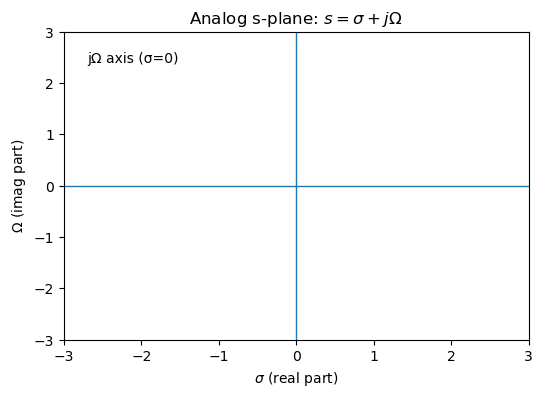

In [36]:
# Visualize the s-plane and the jΩ axis
fig, ax = plt.subplots(figsize=(6,4))
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)
ax.set_xlabel("$\sigma$ (real part)")
ax.set_ylabel("$\Omega$ (imag part)")
ax.set_title("Analog s-plane: $s = \sigma + j\Omega$")
ax.text(0.05, 0.9, "jΩ axis (σ=0)", transform=ax.transAxes)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.show()


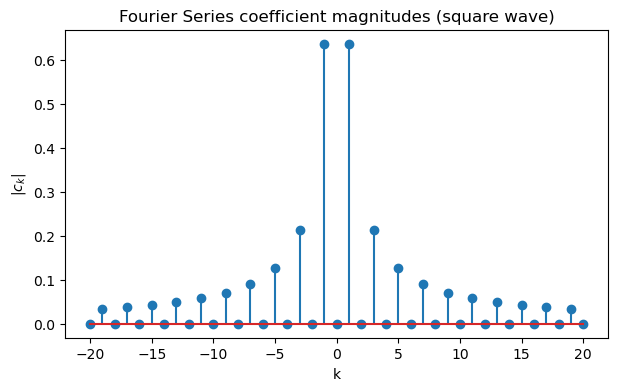

In [37]:
# Periodic square wave over one period
T0 = 2.0
Omega0 = 2*np.pi/T0

# Dense time grid over one period
t = np.linspace(0, T0, 5000, endpoint=False)
x = np.where(t < T0/2, 1.0, -1.0)  # 50% duty square wave

# Compute c_k numerically for a range of k
K = 20
ck = []
ks = np.arange(-K, K+1)
for k in ks:
    ck_k = (1/T0) * np.trapezoid(x * np.exp(-1j*k*Omega0*t), t)
    ck.append(ck_k)
ck = np.array(ck)

# Plot magnitude of coefficients
fig, ax = plt.subplots(figsize=(7,4))
ax.stem(ks, np.abs(ck))
ax.set_xlabel("k")
ax.set_ylabel(r"$|c_k|$")
ax.set_title("Fourier Series coefficient magnitudes (square wave)")
plt.show()


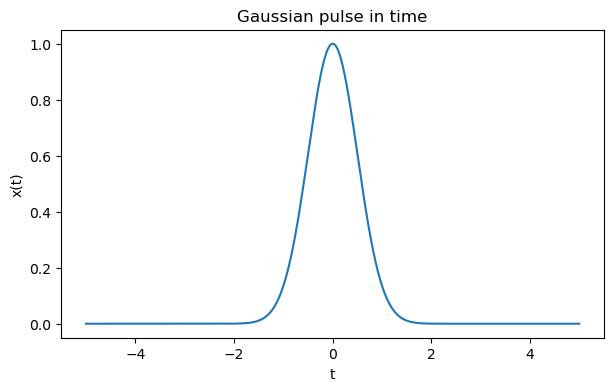

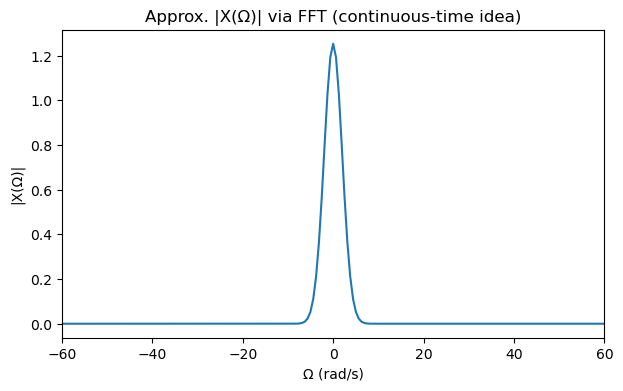

In [4]:
# Gaussian pulse in time
t = np.linspace(-5, 5, 4096, endpoint=False)
dt = t[1]-t[0]
sigma_t = 0.5
x = np.exp(-(t**2)/(2*sigma_t**2))

# Compute approximate Fourier transform via FFT (frequency axis in rad/s)
X = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(x))) * dt  # scale for integral approx
omega = np.fft.fftshift(np.fft.fftfreq(len(t), d=dt)) * 2*np.pi

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(t, x)
ax.set_title("Gaussian pulse in time")
ax.set_xlabel("t")
ax.set_ylabel("x(t)")
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(omega, np.abs(X))
ax.set_title("Approx. |X(Ω)| via FFT (continuous-time idea)")
ax.set_xlabel("Ω (rad/s)")
ax.set_ylabel("|X(Ω)|")
ax.set_xlim(-60, 60)
plt.show()


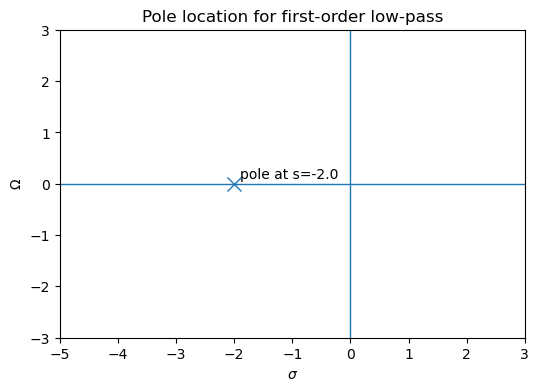

In [5]:
# Plot a simple pole in the s-plane for a first-order low-pass
omega_c = 2.0
pole = -omega_c + 0j

fig, ax = plt.subplots(figsize=(6,4))
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)
ax.plot(np.real(pole), np.imag(pole), 'x', markersize=10)
ax.text(np.real(pole)+0.1, np.imag(pole)+0.1, f"pole at s={pole.real:.1f}")
ax.set_xlabel(r"$\sigma$")
ax.set_ylabel(r"$\Omega$")
ax.set_title("Pole location for first-order low-pass")
ax.set_xlim(-5, 3)
ax.set_ylim(-3, 3)
plt.show()


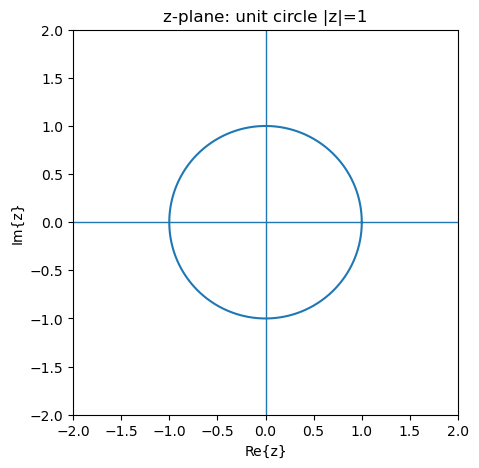

In [6]:
# Visualize the z-plane and the unit circle
theta = np.linspace(0, 2*np.pi, 400)
unit_x = np.cos(theta)
unit_y = np.sin(theta)

fig, ax = plt.subplots(figsize=(5,5))
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)
ax.plot(unit_x, unit_y)
ax.set_aspect('equal', 'box')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title("z-plane: unit circle |z|=1")
ax.set_xlabel("Re{z}")
ax.set_ylabel("Im{z}")
plt.show()


In [7]:
# Demonstrate: DFT equals Z-transform evaluated at unit-circle roots of unity
N = 16
n = np.arange(N)
x = np.cos(2*np.pi*3*n/N) + 0.5*np.sin(2*np.pi*5*n/N)  # a simple discrete signal

# DFT via numpy
X_dft = np.fft.fft(x)

# "Z-transform evaluation" on unit circle points z_k = exp(j2πk/N)
k = np.arange(N)
z_k = np.exp(1j*2*np.pi*k/N)
X_z = np.array([np.sum(x * (zk**(-n))) for zk in z_k])

# Compare
max_err = np.max(np.abs(X_dft - X_z))
max_err


np.float64(1.5727593509286903e-14)

If everything is consistent, the maximum error should be ~ numerical precision (≈ 1e-12 or so).

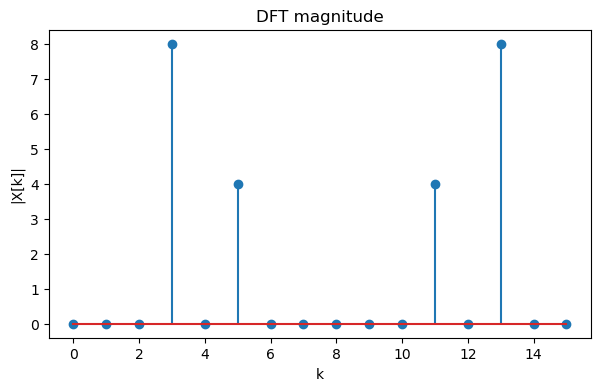

In [8]:
# Plot magnitude spectra
fig, ax = plt.subplots(figsize=(7,4))
ax.stem(np.arange(N), np.abs(X_dft))
ax.set_xlabel("k")
ax.set_ylabel("|X[k]|")
ax.set_title("DFT magnitude")
plt.show()


In [9]:
x = np.array([1, 2, 3, 2, 1], dtype=float)
h = np.array([1, -1, 0.5], dtype=float)

y_time = np.convolve(x, h, mode='full')

N = 1
while N < len(x) + len(h) - 1:
    N *= 2  # convenient power of two for FFT (not required for DFT)

X = np.fft.fft(x, N)
H = np.fft.fft(h, N)
Y = X * H
y_freq = np.fft.ifft(Y).real  # should be (close to) real

# Compare first L samples where L = len(x)+len(h)-1
L = len(x)+len(h)-1
err = np.max(np.abs(y_time - y_freq[:L]))

y_time, y_freq[:L], err


(array([1. , 1. , 1.5, 0. , 0.5, 0. , 0.5]),
 array([1.00000000e+00, 1.00000000e+00, 1.50000000e+00, 3.92523115e-17,
        5.00000000e-01, 0.00000000e+00, 5.00000000e-01]),
 np.float64(2.220446049250313e-16))

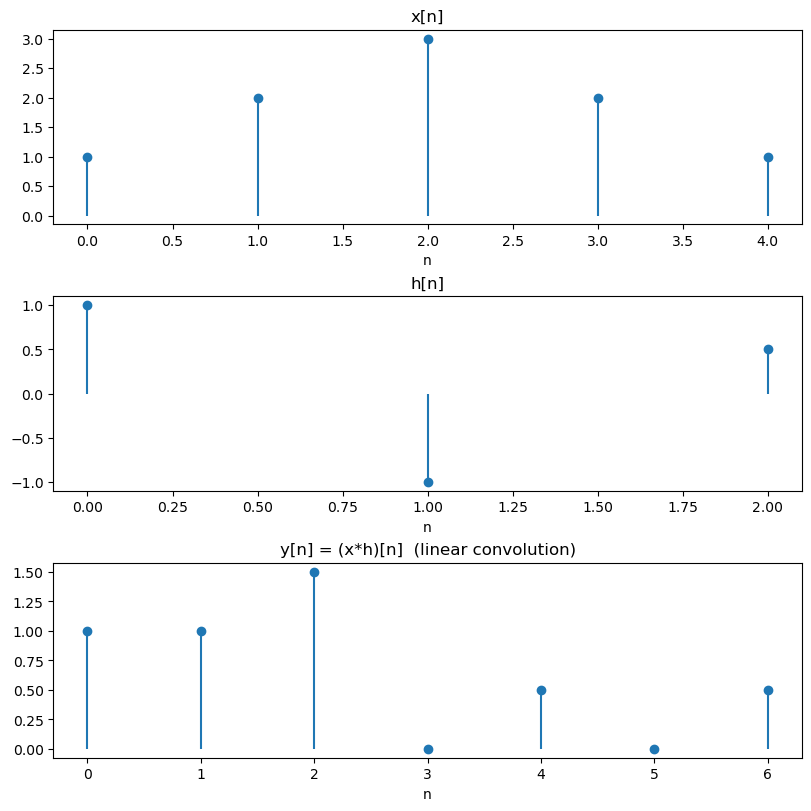

In [10]:
# Plot the sequences and results
fig, axes = plt.subplots(3, 1, figsize=(8, 8), constrained_layout=True)

n_x = np.arange(len(x))
n_h = np.arange(len(h))
n_y = np.arange(len(y_time))

stem(axes[0], n_x, x)
axes[0].set_title("x[n]")
axes[0].set_xlabel("n")

stem(axes[1], n_h, h)
axes[1].set_title("h[n]")
axes[1].set_xlabel("n")

stem(axes[2], n_y, y_time)
axes[2].set_title("y[n] = (x*h)[n]  (linear convolution)")
axes[2].set_xlabel("n")

plt.show()


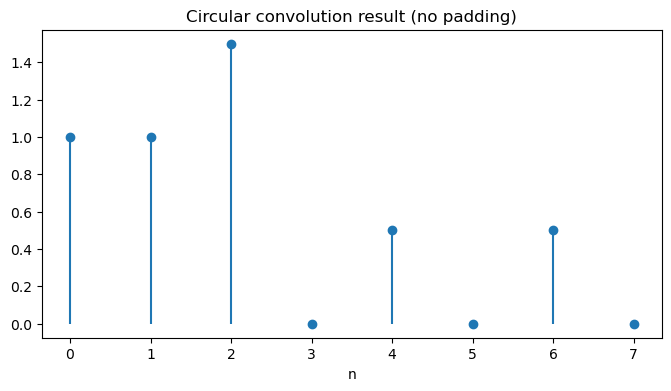

np.float64(2.220446049250313e-16)

In [11]:
N = 8  # intentionally too small (no padding)
X = np.fft.fft(x, N)
H = np.fft.fft(h, N)
y_circ = np.fft.ifft(X*H).real  # length N circular conv result

fig, ax = plt.subplots(figsize=(8,4))
stem(ax, np.arange(N), y_circ)
ax.set_title("Circular convolution result (no padding)")
ax.set_xlabel("n")
plt.show()

# Compare to linear conv truncated/wrapped to length N
y_lin = y_time
y_wrap = np.zeros(N)
for i, val in enumerate(y_lin):
    y_wrap[i % N] += val

np.max(np.abs(y_wrap - y_circ))


The match above illustrates: **DFT multiplication ↔ circular convolution**.  
To get **linear** convolution from FFTs/DFTs, pad to at least $(L_x+L_h-1)$.

---

## 2) FFT: fast implementation of the DFT
The DFT definition is \(O(N^2)\) if computed directly.  
The **FFT** computes the same result in about \(O(N\log N)\) by exploiting:

- periodicity and symmetry of complex exponentials
- divide-and-conquer (e.g., radix-2 Cooley–Tukey factors N into smaller transforms)

**Key point:** FFT is not a different transform — it’s an algorithm for the DFT.

### Quick timing demo (optional)
We’ll compare a naive \(O(N^2)\) DFT with NumPy’s FFT for moderate N.


In [38]:
def dft_naive(x):
    x = np.asarray(x, dtype=complex)
    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-1j * 2*np.pi * k * n / N)
    return W @ x

# Moderate size for demonstration (keep it small enough to run quickly)
N = 2^8192
x = rng.standard_normal(N)

# Time naive DFT
import time
t0 = time.perf_counter()
Xn = dft_naive(x)
t1 = time.perf_counter()

# Time FFT
t2 = time.perf_counter()
Xf = np.fft.fft(x)
t3 = time.perf_counter()

max_err = np.max(np.abs(Xn - Xf))
print(f'naive DFT time = {t1-t0}, FFT time = {t3-t2}, max error = {max_err}, speedup = {(t1-t0)/(t3-t2)}')



naive DFT time = 0.9444156680256128, FFT time = 0.0003849603235721588, max error = 7.323533865351184e-10, speedup = 2453.2805335939693


You should see:
- FFT time ≪ naive DFT time
- max error ~ numerical precision

---

## 14) Summary table
| Concept | Continuous-time (analog) | Discrete-time (digital) |
|---|---|---|
| Periodic representation | Fourier Series (FS) | Discrete-time Fourier Series (DTFS) (for periodic sequences) |
| Aperiodic frequency representation | Fourier Transform (FT) | DTFT (continuous frequency, discrete time) |
| Generalized transform for growth/decay | Laplace Transform (s-plane) | Z-transform (z-plane) |
| “Evaluate on special curve” | FT is Laplace on jΩ axis | DTFT is Z on unit circle |
| Sampled frequency bins | — | DFT (samples of DTFT) |
| Fast algorithm | — | FFT (fast DFT) |
| Time-domain LTI operation | Convolution integral | Convolution sum |
| Theorem | Convolution ↔ multiplication | Convolution ↔ multiplication (DTFT/DFT; circular unless padded) |

---

## 15) Practice questions
1. When does the Fourier transform fail to exist but Laplace can exist?
2. What does it mean for a discrete-time system to have a pole outside the unit circle?
3. Why does using an \(N\)-point DFT implicitly assume periodicity of \(x[n]\) with period \(N\)?
4. Why does “not padding” cause time-domain wrap-around in FFT-based filtering?


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_zplane(poles=None, zeros=None, title="z-plane"):
    theta = np.linspace(0, 2*np.pi, 400)
    unit_x = np.cos(theta)
    unit_y = np.sin(theta)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.plot(unit_x, unit_y)
    
    if zeros is not None and len(zeros) > 0:
        ax.plot(np.real(zeros), np.imag(zeros), 'o', label="zeros")
    if poles is not None and len(poles) > 0:
        ax.plot(np.real(poles), np.imag(poles), 'x', markersize=10, label="poles")

    ax.set_aspect('equal', 'box')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(title)
    ax.set_xlabel("Re{z}")
    ax.set_ylabel("Im{z}")
    ax.legend()
    plt.show()


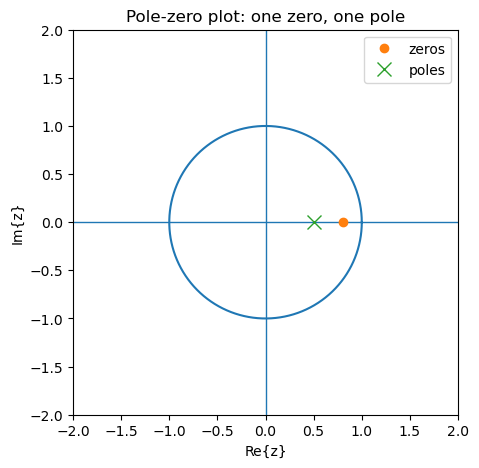

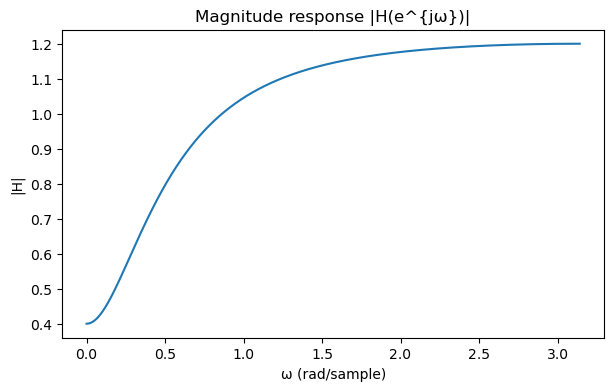

In [14]:
# Plot pole-zero diagram
zeros = np.array([0.8])
poles = np.array([0.5])

plot_zplane(poles=poles, zeros=zeros, title="Pole-zero plot: one zero, one pole")

# Frequency response
w = np.linspace(0, np.pi, 512)
z = np.exp(1j*w)
H = (1 - 0.8*z**-1) / (1 - 0.5*z**-1)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.abs(H))
ax.set_title("Magnitude response |H(e^{jω})|")
ax.set_xlabel("ω (rad/sample)")
ax.set_ylabel("|H|")
plt.show()


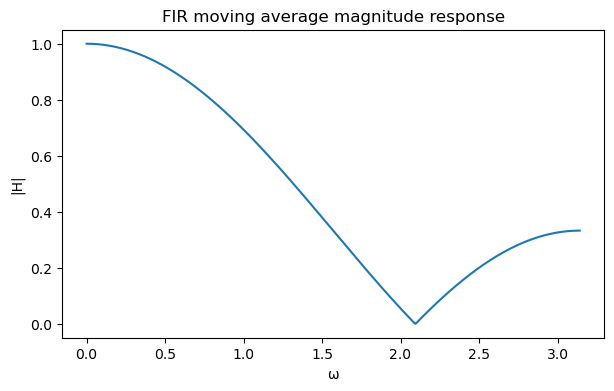

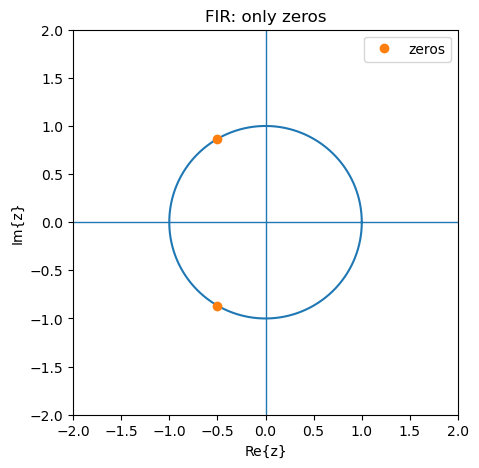

In [15]:
# Simple FIR moving average
b = np.ones(3)/3

w = np.linspace(0, np.pi, 512)
z = np.exp(1j*w)
H = b[0] + b[1]*z**-1 + b[2]*z**-2

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.abs(H))
ax.set_title("FIR moving average magnitude response")
ax.set_xlabel("ω")
ax.set_ylabel("|H|")
plt.show()

zeros = np.roots(b[::-1])
plot_zplane(poles=[], zeros=zeros, title="FIR: only zeros")


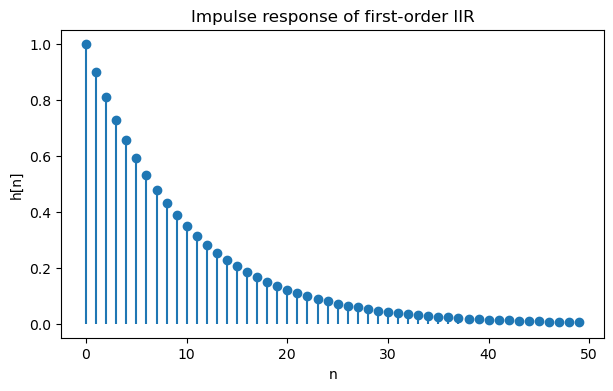

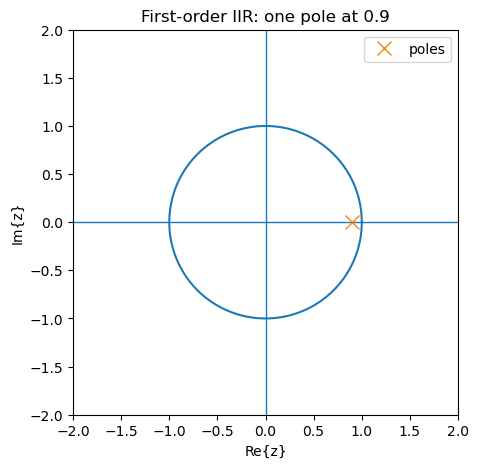

In [16]:
# First-order IIR example
N = 50
h = np.zeros(N)
x = np.zeros(N)
x[0] = 1.0

for n in range(N):
    h[n] = x[n]
    if n-1 >= 0:
        h[n] += 0.9 * h[n-1]

fig, ax = plt.subplots(figsize=(7,4))
ax.stem(np.arange(N), h, basefmt=" ")
ax.set_title("Impulse response of first-order IIR")
ax.set_xlabel("n")
ax.set_ylabel("h[n]")
plt.show()

plot_zplane(poles=[0.9], zeros=[], title="First-order IIR: one pole at 0.9")


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_zplane(poles=None, zeros=None, title="z-plane"):
    theta = np.linspace(0, 2*np.pi, 400)
    unit_x = np.cos(theta)
    unit_y = np.sin(theta)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.plot(unit_x, unit_y)
    
    if zeros is not None and len(zeros) > 0:
        ax.plot(np.real(zeros), np.imag(zeros), 'o', label="zeros")
    if poles is not None and len(poles) > 0:
        ax.plot(np.real(poles), np.imag(poles), 'x', markersize=10, label="poles")

    ax.set_aspect('equal', 'box')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(title)
    ax.set_xlabel("Re{z}")
    ax.set_ylabel("Im{z}")
    ax.legend()
    plt.show()


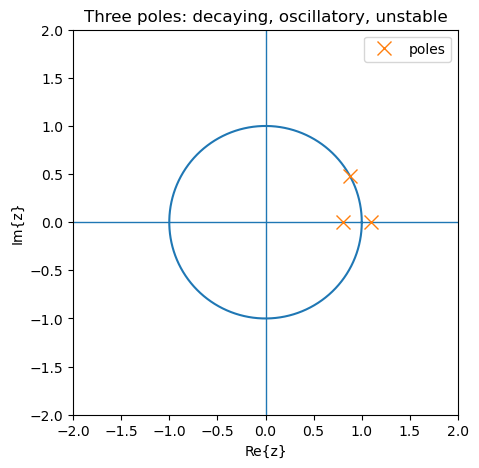

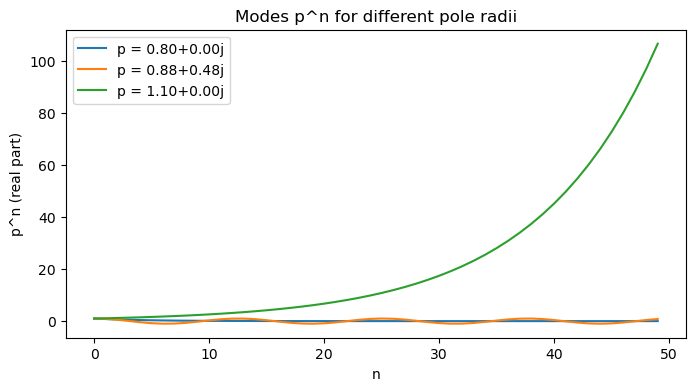

In [18]:
# Example poles and modes
poles = np.array([0.8, np.exp(1j*0.5), 1.1])

plot_zplane(poles=poles, zeros=[], title="Three poles: decaying, oscillatory, unstable")

N = 50
n = np.arange(N)

fig, ax = plt.subplots(figsize=(8,4))
for p in poles:
    h = (p**n).real
    ax.plot(n, h, label=f"p = {p:.2f}")
ax.set_title("Modes p^n for different pole radii")
ax.set_xlabel("n")
ax.set_ylabel("p^n (real part)")
ax.legend()
plt.show()


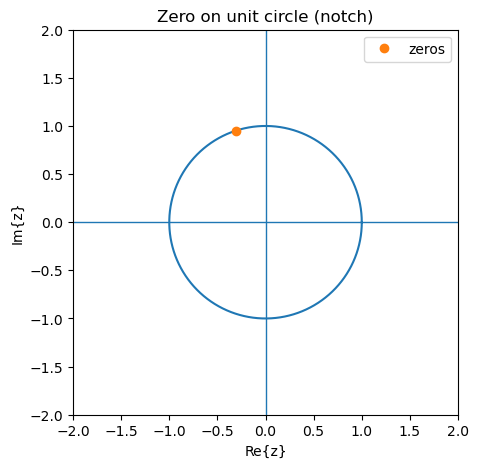

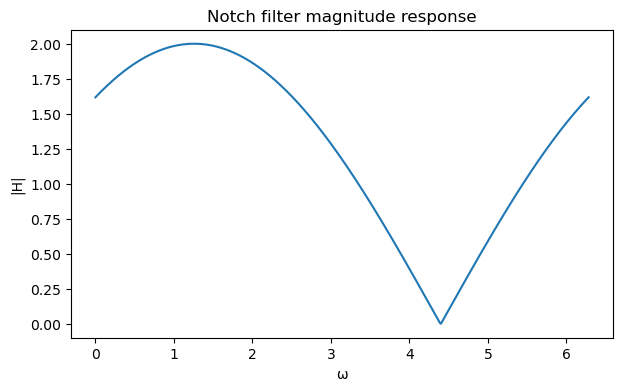

In [19]:
# Notch example
w0 = 0.6*np.pi
zeros = np.array([np.exp(1j*w0)])
plot_zplane(poles=[], zeros=zeros, title="Zero on unit circle (notch)")

w = np.linspace(0, np.pi*2, 512)
z = np.exp(1j*w)
H = 1 - np.exp(-1j*w0)*z**-1

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.abs(H))
ax.set_title("Notch filter magnitude response")
ax.set_xlabel("ω")
ax.set_ylabel("|H|")
plt.show()


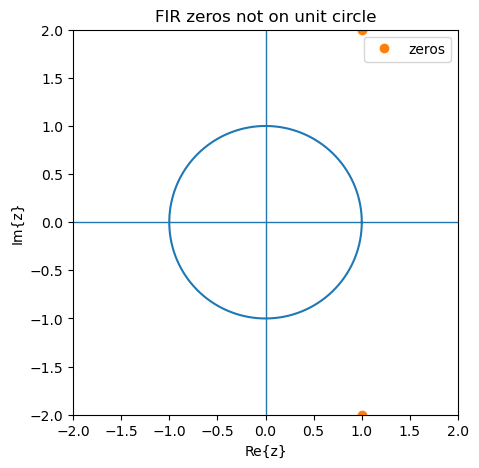

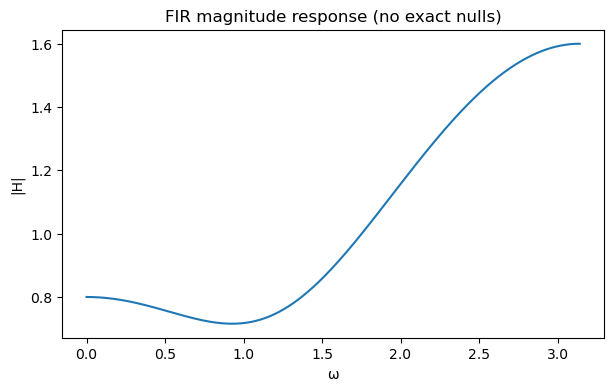

In [20]:
b = np.array([1.0, -0.4, 0.2])
zeros = np.roots(b[::-1])

plot_zplane(poles=[], zeros=zeros, title="FIR zeros not on unit circle")

w = np.linspace(0, np.pi, 512)
z = np.exp(1j*w)
H = b[0] + b[1]*z**-1 + b[2]*z**-2

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.abs(H))
ax.set_title("FIR magnitude response (no exact nulls)")
ax.set_xlabel("ω")
ax.set_ylabel("|H|")
plt.show()


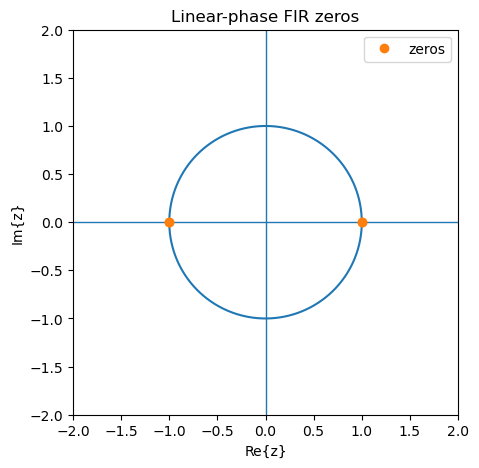

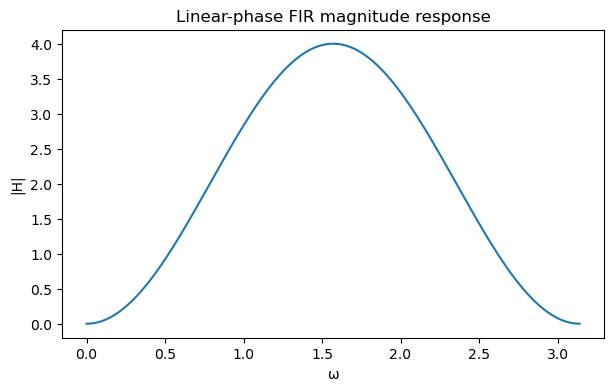

In [21]:
b = np.array([1, 0, -2, 0, 1])  # symmetric FIR
zeros = np.roots(b[::-1])

plot_zplane(poles=[], zeros=zeros, title="Linear-phase FIR zeros")

w = np.linspace(0, np.pi, 512)
z = np.exp(1j*w)
H = sum(b[k]*z**(-k) for k in range(len(b)))

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.abs(H))
ax.set_title("Linear-phase FIR magnitude response")
ax.set_xlabel("ω")
ax.set_ylabel("|H|")
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_zplane(poles=None, zeros=None, title="z-plane"):
    theta = np.linspace(0, 2*np.pi, 400)
    unit_x = np.cos(theta)
    unit_y = np.sin(theta)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.plot(unit_x, unit_y)
    
    if zeros is not None and len(zeros) > 0:
        ax.plot(np.real(zeros), np.imag(zeros), 'o', label="zeros")
    if poles is not None and len(poles) > 0:
        ax.plot(np.real(poles), np.imag(poles), 'x', markersize=10, label="poles")

    ax.set_aspect('equal', 'box')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(title)
    ax.set_xlabel("Re{z}")
    ax.set_ylabel("Im{z}")
    ax.legend()
    plt.show()


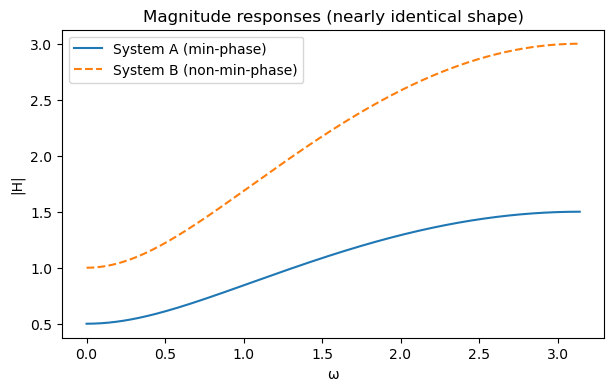

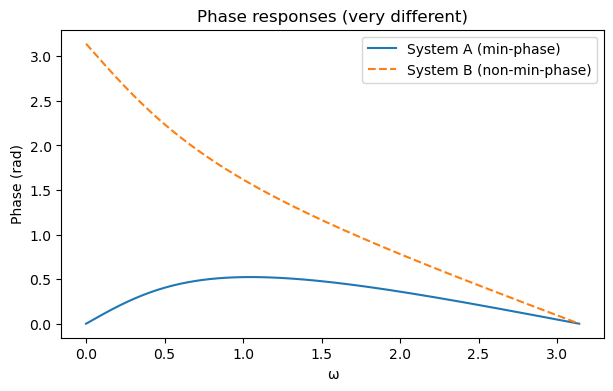

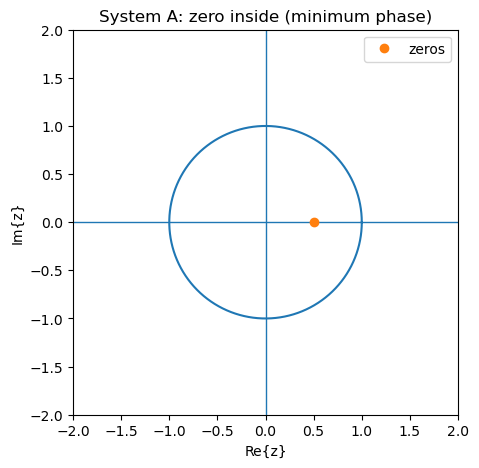

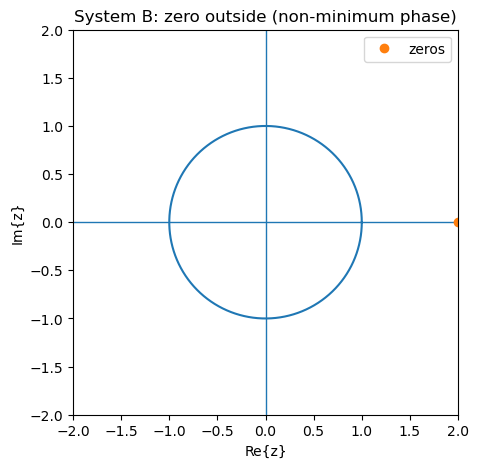

In [23]:
# Define two systems with reflected zeros
z0 = 0.5

# System A: zero inside unit circle
bA = np.array([1, -z0])

# System B: zero outside (reflected)
bB = np.array([1, -1/z0])

w = np.linspace(0, np.pi, 1024)
z = np.exp(1j*w)

HA = bA[0] + bA[1]*z**-1
HB = bB[0] + bB[1]*z**-1

# Magnitude
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.abs(HA), label="System A (min-phase)")
ax.plot(w, np.abs(HB), '--', label="System B (non-min-phase)")
ax.set_title("Magnitude responses (nearly identical shape)")
ax.set_xlabel("ω")
ax.set_ylabel("|H|")
ax.legend()
plt.show()

# Phase
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.unwrap(np.angle(HA)), label="System A (min-phase)")
ax.plot(w, np.unwrap(np.angle(HB)), '--', label="System B (non-min-phase)")
ax.set_title("Phase responses (very different)")
ax.set_xlabel("ω")
ax.set_ylabel("Phase (rad)")
ax.legend()
plt.show()

# Pole-zero plots
plot_zplane(poles=[], zeros=[z0], title="System A: zero inside (minimum phase)")
plot_zplane(poles=[], zeros=[1/z0], title="System B: zero outside (non-minimum phase)")


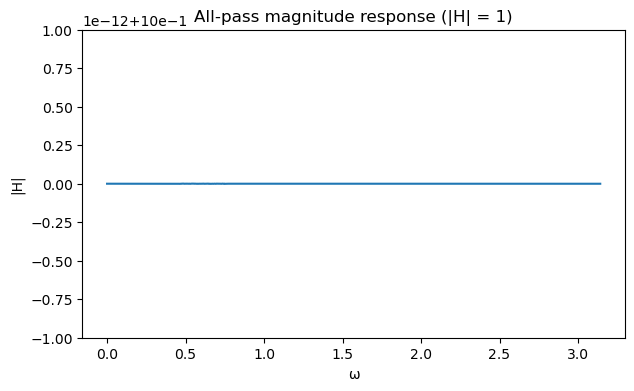

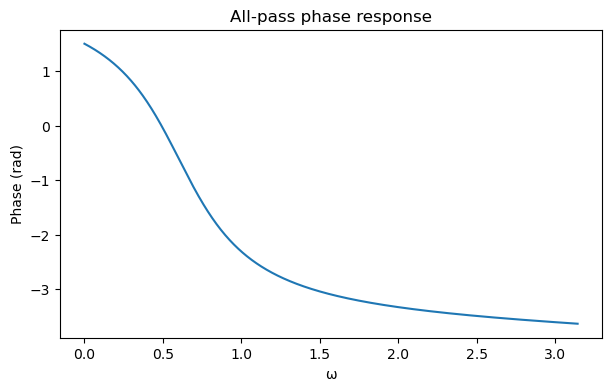

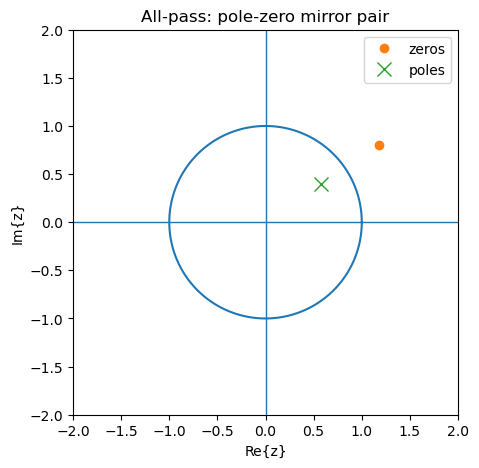

In [24]:
# First-order all-pass
a = 0.7 * np.exp(1j*0.6)

# Frequency response
w = np.linspace(0, np.pi, 1024)
z = np.exp(1j*w)
H = (z**-1 - np.conj(a)) / (1 - a*z**-1)

# Magnitude
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.abs(H))
ax.set_title("All-pass magnitude response (|H| = 1)")
ax.set_xlabel("ω")
ax.set_ylabel("|H|")
plt.show()

# Phase
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(w, np.unwrap(np.angle(H)))
ax.set_title("All-pass phase response")
ax.set_xlabel("ω")
ax.set_ylabel("Phase (rad)")
plt.show()

# Pole-zero plot
plot_zplane(poles=[a], zeros=[1/np.conj(a)], title="All-pass: pole-zero mirror pair")


In [25]:
import numpy as np
import matplotlib.pyplot as plt


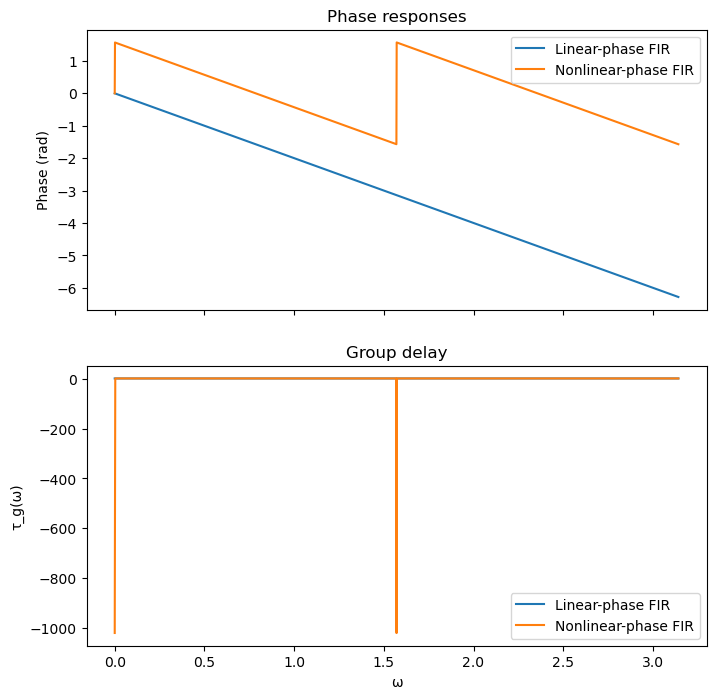

In [26]:
# Linear-phase FIR (symmetric kernel)
b_lin = np.array([1, 2, 3, 2, 1], dtype=float)
b_lin = b_lin / np.sum(b_lin)

# Nonlinear-phase FIR (asymmetric)
b_non = np.array([1, 0, 0, 0, -1], dtype=float)

w = np.linspace(0, np.pi, 2048)
z = np.exp(1j*w)

def freq_response(b):
    H = sum(b[k] * z**(-k) for k in range(len(b)))
    return H

H_lin = freq_response(b_lin)
H_non = freq_response(b_non)

# Phase
phi_lin = np.unwrap(np.angle(H_lin))
phi_non = np.unwrap(np.angle(H_non))

# Group delay (numerical derivative)
tau_lin = -np.gradient(phi_lin, w)
tau_non = -np.gradient(phi_non, w)

# Plot phase
fig, ax = plt.subplots(2, 1, figsize=(8,8), sharex=True)

ax[0].plot(w, phi_lin, label="Linear-phase FIR")
ax[0].plot(w, phi_non, label="Nonlinear-phase FIR")
ax[0].set_title("Phase responses")
ax[0].set_ylabel("Phase (rad)")
ax[0].legend()

# Plot group delay
ax[1].plot(w, tau_lin, label="Linear-phase FIR")
ax[1].plot(w, tau_non, label="Nonlinear-phase FIR")
ax[1].set_title("Group delay")
ax[1].set_xlabel("ω")
ax[1].set_ylabel("τ_g(ω)")
ax[1].legend()

plt.show()


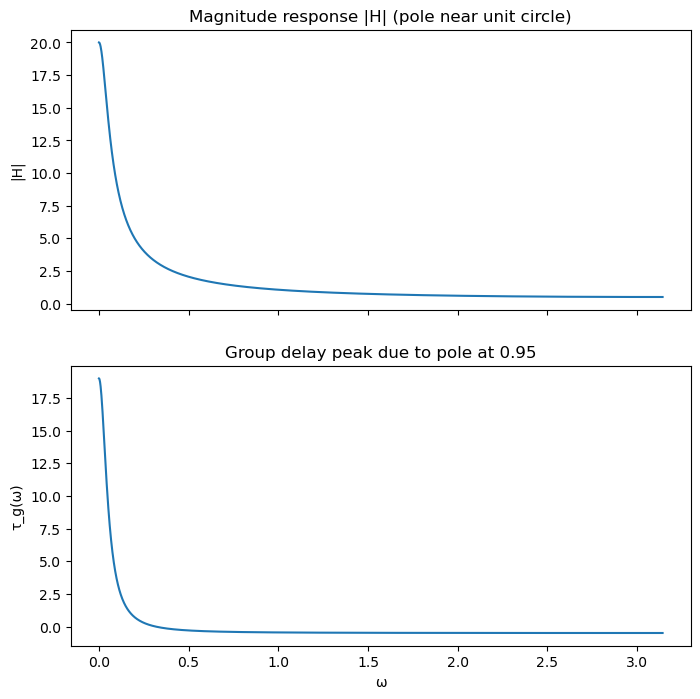

In [27]:
# IIR with pole near unit circle
a = 0.95
b = np.array([1.0])
# H(z) = 1 / (1 - a z^{-1})

H = 1 / (1 - a * z**-1)
phi = np.unwrap(np.angle(H))
tau = -np.gradient(phi, w)

fig, ax = plt.subplots(2, 1, figsize=(8,8), sharex=True)

ax[0].plot(w, np.abs(H))
ax[0].set_title("Magnitude response |H| (pole near unit circle)")
ax[0].set_ylabel("|H|")

ax[1].plot(w, tau)
ax[1].set_title("Group delay peak due to pole at 0.95")
ax[1].set_xlabel("ω")
ax[1].set_ylabel("τ_g(ω)")

plt.show()


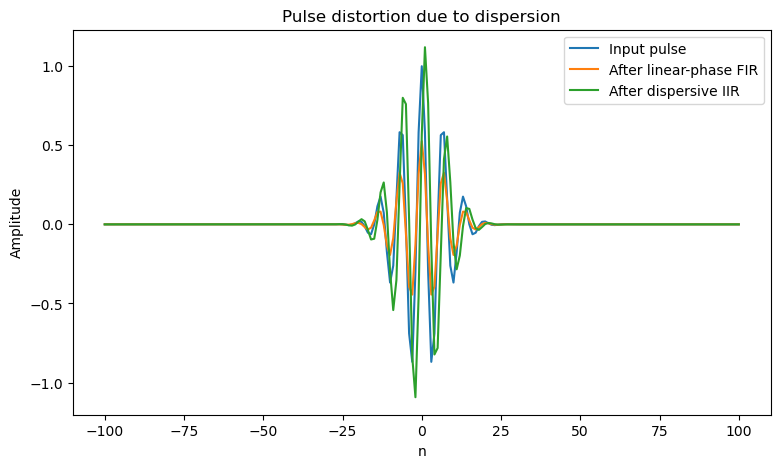

In [28]:
# Narrowband pulse through dispersive vs nondispersive systems

# Input pulse
n = np.arange(-100, 101)
x = np.exp(-0.01*n**2) * np.cos(0.3*np.pi*n)

# Linear-phase FIR
b = b_lin
y_lin = np.convolve(x, b, mode='same')

# Dispersive IIR (pole near unit circle)
a = 0.95
y_iir = np.zeros_like(x)
for i in range(len(x)):
    y_iir[i] = x[i]
    if i-1 >= 0:
        y_iir[i] += a * y_iir[i-1]

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(n, x, label="Input pulse")
ax.plot(n, y_lin, label="After linear-phase FIR")
ax.plot(n, y_iir, label="After dispersive IIR")
ax.set_title("Pulse distortion due to dispersion")
ax.set_xlabel("n")
ax.set_ylabel("Amplitude")
ax.legend()
plt.show()
